In [255]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

## Exercise 6.1

#### (a)
In this example, for the pooled estimates, the posterior of $\theta$ is
$$
\theta \sim \mathcal{N}(7.7, 4.1^2)
$$
We simulate 1000 samples $\{\theta_s\}_{s=1}^{1000}$ from the posterior, for each $\theta_s$, we sample $\{y^{rep}_{s, i}\}_{i=1}^8$ as the replicated data and calculate the expected ordered statistics.

In [256]:
import itertools
theta = np.random.normal(7.7, 4.1, size=1000)
sigma = np.array([15., 10., 16., 11., 9., 11., 10., 18.])
y_rep = map(lambda a: np.random.normal(a[0], a[1]), itertools.product(theta, sigma))
y_rep = np.array(y_rep).reshape((1000, 8))
ordered_yrep = np.sort(y_rep, axis=1)[:, ::-1]
print 'Mean ordered statistics of y_rep:'
print ordered_yrep.mean(axis=0)

Mean ordered statistics of y_rep:
[ 26.77047645  18.48883105  13.60913845   9.63114806   6.09842553
   2.43596769  -2.56772247 -10.45314326]


We can see that the mean ordered statistics are near the expected ordered statistics given. Then we calculate the posterior p-value using the replicated data.

In [257]:
y = np.array([28., 18., 12., 8., 7., 1., -1., -3.])
pv = (ordered_yrep > y).sum(axis=0) * 1. / ordered_yrep.shape[0]
print 'Posterior predictive p-value for ordered statistics:'
print pv

Posterior predictive p-value for ordered statistics:
[ 0.409  0.521  0.609  0.616  0.444  0.579  0.417  0.236]


None of the p-values are extreme, so the model fits the data here.

#### (b)
Because its hypothesis that all coaching effects are the same in all schools prevent people from further analysis like, for example, why the effects are so good in school A rather than school C.

## Exercise 6.2

#### (a, b)
##### Model 1
Let $y$ denote the number of fatal accidents. We put noninformative prior on $\theta$
$$
\begin{aligned}
p(\theta) &\propto \frac{1}{\theta} \propto \mathrm{Gamma}(0, 0) \\
y_{1:n} &\sim \mathrm{Poisson}(\theta)
\end{aligned}
$$
$$
p(\theta|y) = \mathrm{Gamma}(\sum_{i=1}^n y_i, n)
$$

In [258]:
y = np.array([24, 25, 31, 31, 22, 21, 26, 20, 16, 22], dtype='float')
print 'Posterior: Gamma(%d, %d)' % (y.sum(), y.shape[0])

Posterior: Gamma(238, 10)


We use the following test quantity to test if there is some trend over time.
$$
T(y) = \sum_{i=1}^{n-1} (y_i - y_{i-1})
$$

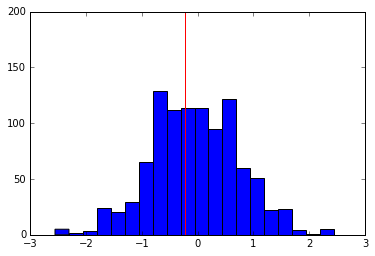

In [259]:
theta = np.random.gamma(y.sum(), 1./y.shape[0], size=1000)
y_rep = np.array(map(lambda a: np.random.poisson(a, size=y.shape[0]), theta))
y_rep_t = np.mean((y_rep[:, 1:] - y_rep[:, :-1]), axis=1)
y_t = np.mean((y[1:] - y[:-1]))
plt.hist(y_rep_t, bins=20)
plt.vlines(y_t, 0, 200, color='r')
_ = plt.ylim([0, 200])

In [260]:
print 'Posterior predictive p-value:', (
    y_rep_t > y_t).sum(axis=0) * 1. / y_rep_t.shape[0]

Posterior predictive p-value: 0.556


##### Model 2
Let $x$ denote the number of passenger miles flown.
$$
\begin{aligned}
p(\theta) &\propto \frac{1}{\theta} \propto \mathrm{Gamma}(0, 0) \\
y_i &\sim \mathrm{Poisson}(\theta x_i),\;i=1,2,\dots,n
\end{aligned}
$$
$$
p(\theta|y) = \mathrm{Gamma}(\sum_{i=1}^n y_i, \sum_{i=1}^n x_i)
$$

In [261]:
death = np.array([734, 516, 754, 877, 814, 362, 764, 809, 223, 1066], dtype='float')
death_rate = np.array([.19, .12, .15, .16, .14, .06, .13, .13, .03, .15], dtype='float')
x = death / death_rate * 1e8
print 'Number of passenger miles flown each year:'
print x

Number of passenger miles flown each year:
[  3.86315789e+11   4.30000000e+11   5.02666667e+11   5.48125000e+11
   5.81428571e+11   6.03333333e+11   5.87692308e+11   6.22307692e+11
   7.43333333e+11   7.10666667e+11]


In [262]:
print 'Posterior: Gamma(%d, %s)' % (y.sum(), x.sum())

Posterior: Gamma(238, 5.7158693609e+12)


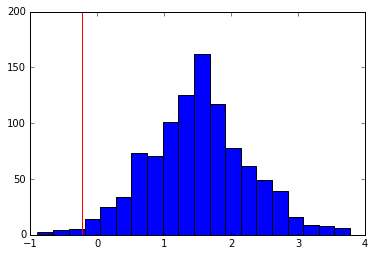

In [263]:
theta = np.random.gamma(y.sum(), 1./x.sum(), size=1000)
y_rep = np.array(map(lambda a: np.random.poisson(a[0]*a[1]),
                     itertools.product(theta, x)))
y_rep = y_rep.reshape((1000, -1))
y_rep_t = np.mean((y_rep[:, 1:] - y_rep[:, :-1]), axis=1)
y_t = np.mean((y[1:] - y[:-1]))
fig = plt.figure()
plt.hist(y_rep_t, bins=20)
plt.vlines(y_t, 0, 200, color='r')
_ = plt.ylim([0, 200])

In [264]:
print 'Posterior predictive p-value:', (
    y_rep_t > y_t).sum(axis=0) * 1. / y_rep_t.shape[0]

Posterior predictive p-value: 0.989


##### Model 3
Let $z$ denote the number of passenger deaths.
$$
\begin{aligned}
p(\theta) &\propto \frac{1}{\theta} \propto \mathrm{Gamma}(0, 0) \\
z_{1:n} &\sim \mathrm{Poisson}(\theta)
\end{aligned}
$$
$$
p(\theta|z) = \mathrm{Gamma}(\sum_{i=1}^n z_i, n)
$$

In [265]:
print 'Posterior: Gamma(%d, %d)' % (death.sum(), death.shape[0])

Posterior: Gamma(6919, 10)


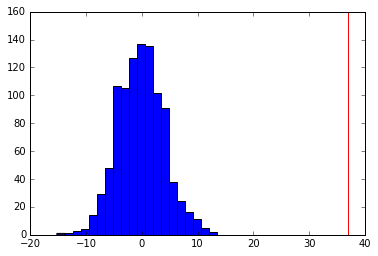

In [266]:
theta = np.random.gamma(death.sum(), 1./death.shape[0], size=1000)
z_rep = np.array(map(lambda a: np.random.poisson(a, size=death.shape[0]), theta))
z_rep_t = np.mean((z_rep[:, 1:] - z_rep[:, :-1]), axis=1)
z_t = np.mean((death[1:] - death[:-1]))
plt.hist(z_rep_t, bins=20)
plt.vlines(z_t, 0, 160, color='r')
_ = plt.ylim([0, 160])

In [267]:
print 'Posterior predictive p-value:', (
    z_rep_t > z_t).sum(axis=0) * 1. / z_rep_t.shape[0]

Posterior predictive p-value: 0.0


##### Model 4
Let $z$ denote the number of passenger miles flown.
$$
\begin{aligned}
p(\theta) &\propto \frac{1}{\theta} \propto \mathrm{Gamma}(0, 0) \\
z &\sim \mathrm{Poisson}(\theta x_i),\;i=1,2,\dots,n
\end{aligned}
$$
$$
p(\theta|z) = \mathrm{Gamma}(\sum_{i=1}^n z_i, \sum_{i=1}^n x_i)
$$

In [268]:
print 'Posterior: Gamma(%d, %s)' % (death.sum(), x.sum())

Posterior: Gamma(6919, 5.7158693609e+12)


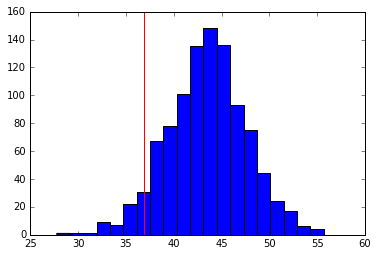

In [269]:
theta = np.random.gamma(death.sum(), 1./x.sum(), size=1000)
z_rep = np.array(map(lambda a: np.random.poisson(a[0]*a[1]),
                     itertools.product(theta, x)))
z_rep = z_rep.reshape((1000, -1))
z_rep_t = np.mean((z_rep[:, 1:] - z_rep[:, :-1]), axis=1)
z_t = np.mean((death[1:] - death[:-1]))
plt.hist(z_rep_t, bins=20)
plt.vlines(z_t, 0, 160, color='r')
_ = plt.ylim([0, 160])

In [270]:
print 'Posterior predictive p-value:', (
    z_rep_t > z_t).sum(axis=0) * 1. / z_rep_t.shape[0]

Posterior predictive p-value: 0.94


## Exercise 6.3

#### (a)
According to the Exercise 6.2, we can see that the independent poisson model is good at modeling the number of fatal accidents, but failed to do well on the number of passenger deaths. So we propose a new model as follows:

Let $y$ denote the number of fatal accidents, $z_{i}$ denote the **average** number of passenger deaths of each accident in year $i$, and $x$ denote the number of passenger miles flown.
$$
\begin{aligned}
p(\theta) &\propto \frac{1}{\theta} \propto \mathrm{Gamma}(0, 0) \\
y_i &\sim \mathrm{Poisson}(\theta)\quad i=1,\dots,n \\
p(\alpha) &\propto \frac{1}{\alpha} \propto \mathrm{Gamma}(0, 0) \\
z_i &\sim \mathrm{Poisson}(\alpha x_i) \\
\end{aligned}
$$
So the passenger deaths number given in the data is $y_iz_i$ in this model.

#### (b)
$$
p(\theta|y) = \mathrm{Gamma}(\sum_{i=1}^n y_i, n)
$$
$$
p(\alpha|z) = \mathrm{Gamma}(\sum_{i=1}^n z_i, \sum_{i=1}^n x_i)
$$
The inference of $y$ does not change.

In [271]:
y = np.array([24, 25, 31, 31, 22, 21, 26, 20, 16, 22], dtype='float')
print 'Posterior of theta: Gamma(%d, %d)' % (y.sum(), y.shape[0])

Posterior of theta: Gamma(238, 10)


In [272]:
death = np.array([734, 516, 754, 877, 814, 362, 764, 809, 223, 1066], dtype='float')
death_rate = np.array([.19, .12, .15, .16, .14, .06, .13, .13, .03, .15], dtype='float')
x = death / death_rate * 1e8
z = death * 1. / y
print 'z:', z

z: [ 30.58333333  20.64        24.32258065  28.29032258  37.          17.23809524
  29.38461538  40.45        13.9375      48.45454545]


In [273]:
print 'Posterior of alpha: Gamma(%d, %s)' % (z.sum(), x.sum())

Posterior of alpha: Gamma(290, 5.7158693609e+12)


#### (c)
We simulate 1000 samples of theta and alpha from the posterior to forecast the airline fatalities.

##### Prediction of Accidents

95% predictive interval: [14, 34]


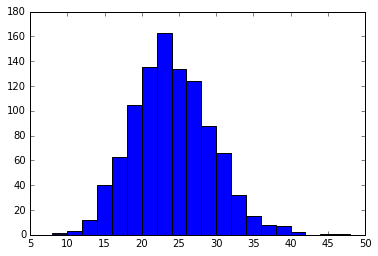

In [274]:
theta = np.random.gamma(y.sum(), 1./y.shape[0], size=1000)
y_new = np.array(map(lambda a: np.random.poisson(a), theta))
_ = plt.hist(y_new, bins=20)
y_new.sort()
print '95% predictive interval:', [y_new[25], y_new[975]]

##### Prediction of Deaths

95% predictive interval: [512, 1584]


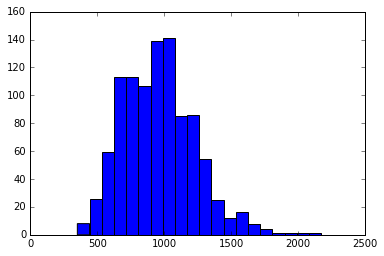

In [275]:
alpha = np.random.gamma(z.sum(), 1./x.sum(), size=1000)
x_new = 8e11
z_new = np.array(map(lambda a: np.random.poisson(a*x_new), alpha))
death = z_new * y_new
_ = plt.hist(death, bins=20)
death.sort()
print '95% predictive interval:', [death[25], death[975]]

##### Predictions of Deaths by old model
The predictive interval given by old model 4 is

95% predictive interval: [908, 1036]


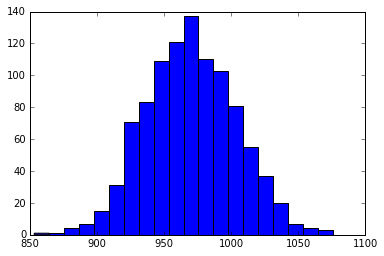

In [276]:
death = np.array([734, 516, 754, 877, 814, 362, 764, 809, 223, 1066], dtype='float')
theta = np.random.gamma(death.sum(), 1./x.sum(), size=1000)
x_new = 8e11
death = np.array(map(lambda a: np.random.poisson(a*x_new), theta))
_ = plt.hist(death, bins=20)
death.sort()
print '95% predictive interval:', [death[25], death[975]]

We can see our new model significantly outperforms the old model by **including the correct prediction** of the number of deaths (546) in the 95% predictive interval.

#### (d)

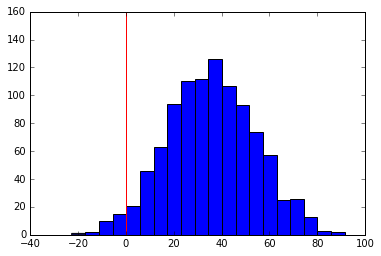

In [277]:
alpha = np.random.gamma(z.sum(), 1./x.sum(), size=1000)
z_rep = np.array(map(lambda a: np.random.poisson(a[0]*a[1]),
                     itertools.product(alpha, x)))
z_rep = z_rep.reshape((1000, -1))
z_rep = z_rep*y
z_rep_t = np.mean((z_rep[:, 1:] - z_rep[:, :-1]), axis=1)
z_t = np.mean((death[1:] - death[:-1]))
plt.hist(z_rep_t, bins=20)
plt.vlines(z_t, 0, 160, color='r')
_ = plt.ylim([0, 160])

In [278]:
print 'Posterior predictive p-value:', (
    z_rep_t > z_t).sum(axis=0) * 1. / z_rep_t.shape[0]

Posterior predictive p-value: 0.972


The new model does not fit better **in terms of** the test quantity of modeling time trend. In fact, we only design it better in modeling group behaviour of the deaths.